@author:
	Li Hantao		G2101725H  HLI038@e.ntu.edu.sg

In [1]:
import nltk
import json

##### Calculate the number of reviews in a .json file 

In [ ]:
num = sum(1 for line in open('json_chinese.json', encoding='utf-8'))
print(num)

##### Show reviews

In [ ]:
number = 40

with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for i in range(1, number + 1):
        line = f.readline()
        d = json.loads(line)
        print(d)
    f.close()

##### Extract the review of a specific business, then calculate the average data

In [ ]:
with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for i in range(1, 8635403): #8635403 reviews in the whole dataset
        line = f.readline()
        d = json.loads(line)
        #if d['business_id'] == '0WqROvvlHjvpeHIP0fg9EQ': #Pdx
        if d['business_id'] == '7ee6XyKyeduI-Rbc6L5j2Q': #Ning-tu
            print(d)
            b = json.dumps(d)
            f2 = open('json_chinese.json', 'a+')
            f2.write(b)
            f2.write('\n')
            f2.close()
    f.close()

In [2]:
stars = []
useful = []
funny = []
cool = []
with open('json_chinese.json', encoding='utf-8') as f:
    #pdx->866 chinese->69
    for i in range(1, 69):
        line = f.readline()
        d = json.loads(line)  
        stars.append(d['stars'])
        useful.append(d['useful'])
        funny.append(d['funny'])
        cool.append(d['cool'])
    f.close()
avg_stars = sum(stars) / len(stars)
avg_useful = sum(useful) / len(useful)
avg_funny = sum(funny) / len(funny)
avg_cool = sum(cool) / len(cool)

print(avg_stars, avg_useful, avg_funny, avg_cool)

3.9411764705882355 1.588235294117647 1.1323529411764706 1.1176470588235294


##### Load the text

In [14]:
text = " "
with open('json_chinese.json', encoding='utf-8') as f:
    #pdx->866 chinese->69
    for i in range(1, 69):
        line = f.readline()
        d = json.loads(line)  
        text_list = [text, d['text']]
        text = " ".join(text_list)
    f.close()

##### tokenize

In [15]:
from nltk import word_tokenize
from nltk import word_tokenize,pos_tag

sentence = text
token_word = word_tokenize(sentence)  
token_words = pos_tag(token_word)     
#print(token_words)

##### Lemmatize

In [16]:
from nltk.stem import WordNet r
words_lematizer = []
wordnet_lematizer = WordNetLemmatizer()
for word, tag in token_words:
    if tag.startswith('NN'):
        word_lematizer =  wordnet_lematizer.lemmatize(word, pos='n')  # n代表名词
    elif tag.startswith('VB'): 
        word_lematizer =  wordnet_lematizer.lemmatize(word, pos='v')   # v代表动词
    elif tag.startswith('JJ'): 
        word_lematizer =  wordnet_lematizer.lemmatize(word, pos='a')   # a代表形容词
    elif tag.startswith('R'): 
        word_lematizer =  wordnet_lematizer.lemmatize(word, pos='r')   # r代表代词
    else: 
        word_lematizer =  wordnet_lematizer.lemmatize(word)
    words_lematizer.append(word_lematizer)
#print(words_lematizer)

##### Stopword, punctions, lower case

In [17]:
from nltk.corpus import stopwords 

#去除停用词，但很奇怪，这步没有效果，需要后续重新再做一遍
cleaned_words = [word for word in words_lematizer if word not in stopwords.words('english')]

#去除标点符号
characters = [',', '.','DBSCAN', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%','-','...','^','{','}']
words_list = [word for word in cleaned_words if word not in characters]

#全部变为小写
words_lists = [x.lower() for x in words_list ]


##### STEMMING

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
words_stemmer = [stemmer.stem(token_word) for token_word in words_lists]
#print(words_stemmer)

##### exclude the stopwords again

In [19]:
from nltk.corpus import stopwords
another_stopword = ['n\'t', '\'s']

filtered_words = [word for word in words_stemmer if word not in stopwords.words('english')]
filtered_words_withstem = [word for word in filtered_words if word not in another_stopword]

filtered_wordslist = [word for word in words_lists if word not in stopwords.words('english')]
filtered_wordslist_withoutstem = [word for word in filtered_wordslist if word not in another_stopword]

#### Plot the graph

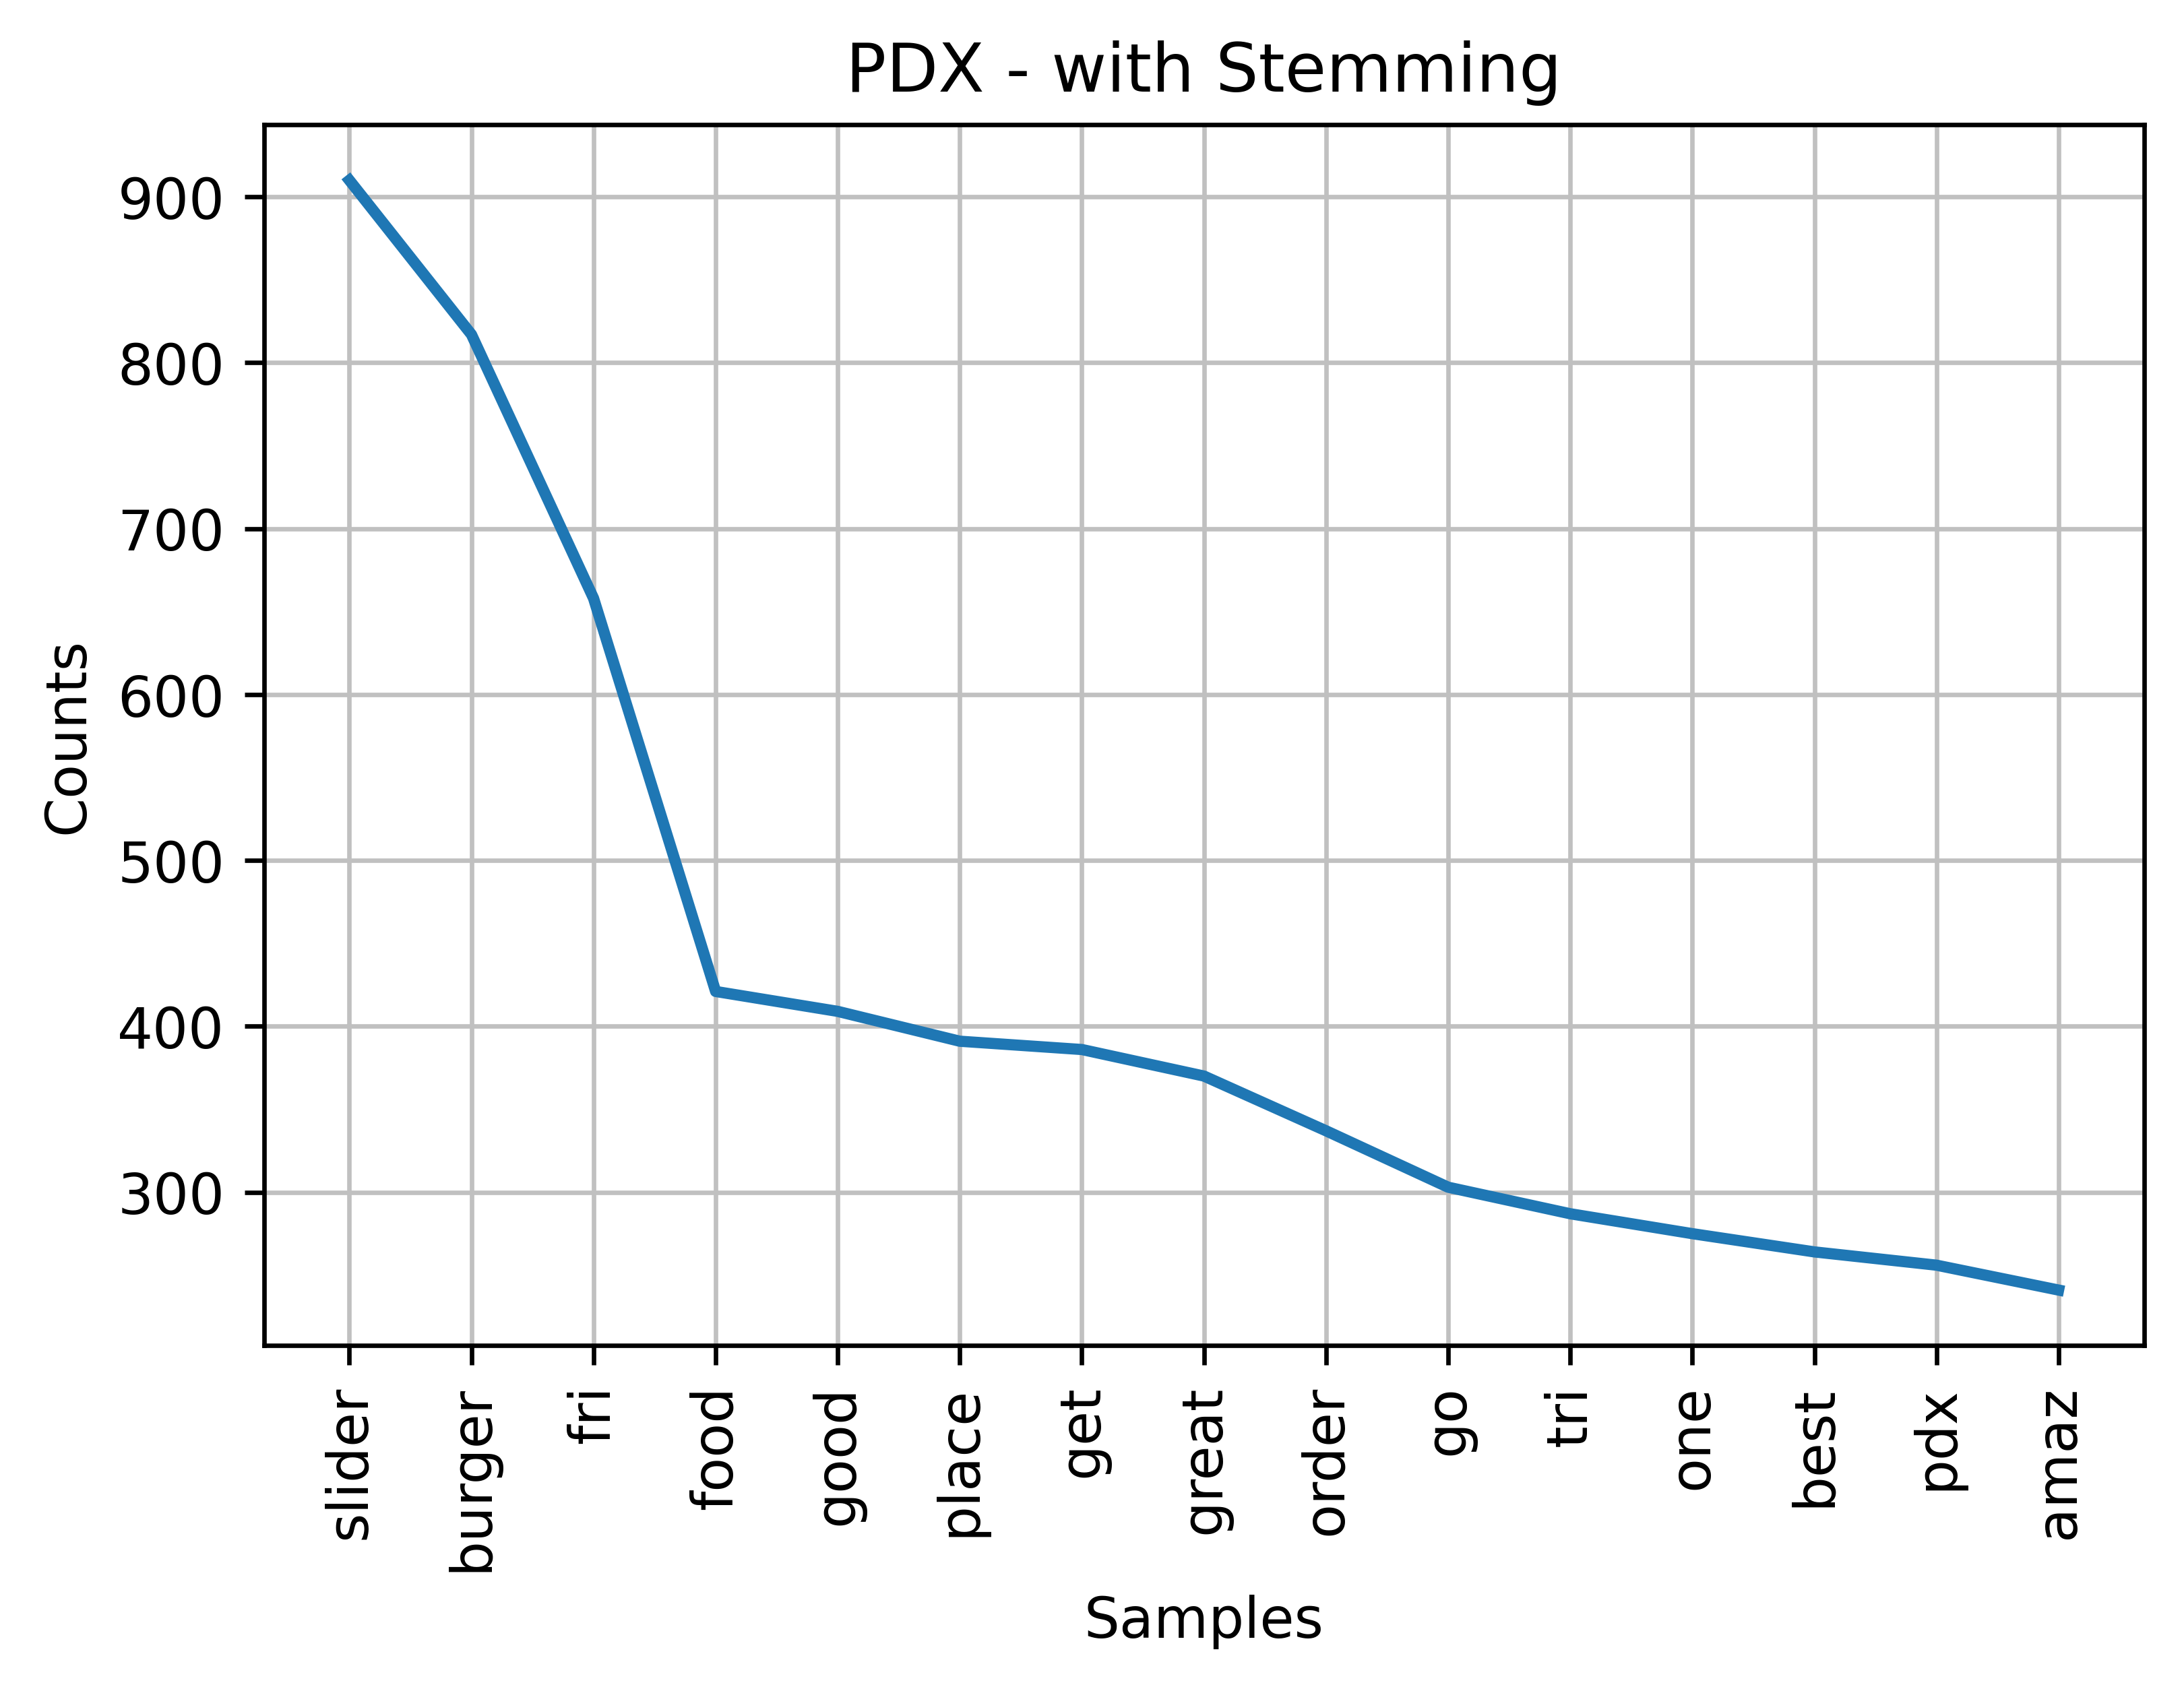

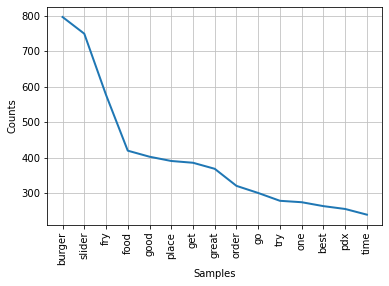

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
from nltk import FreqDist
import matplotlib.pyplot as plt

freq = FreqDist(filtered_words_withstem)   
fig = plt.figure(dpi=600)
plt.title("PDX - with Stemming")
freq.plot(15,cumulative=False)
freq = FreqDist(filtered_wordslist_withoutstem)   
freq.plot(15,cumulative=False)

##### Output the list

In [ ]:
freq.tabulate(15)

##### Save the fighre

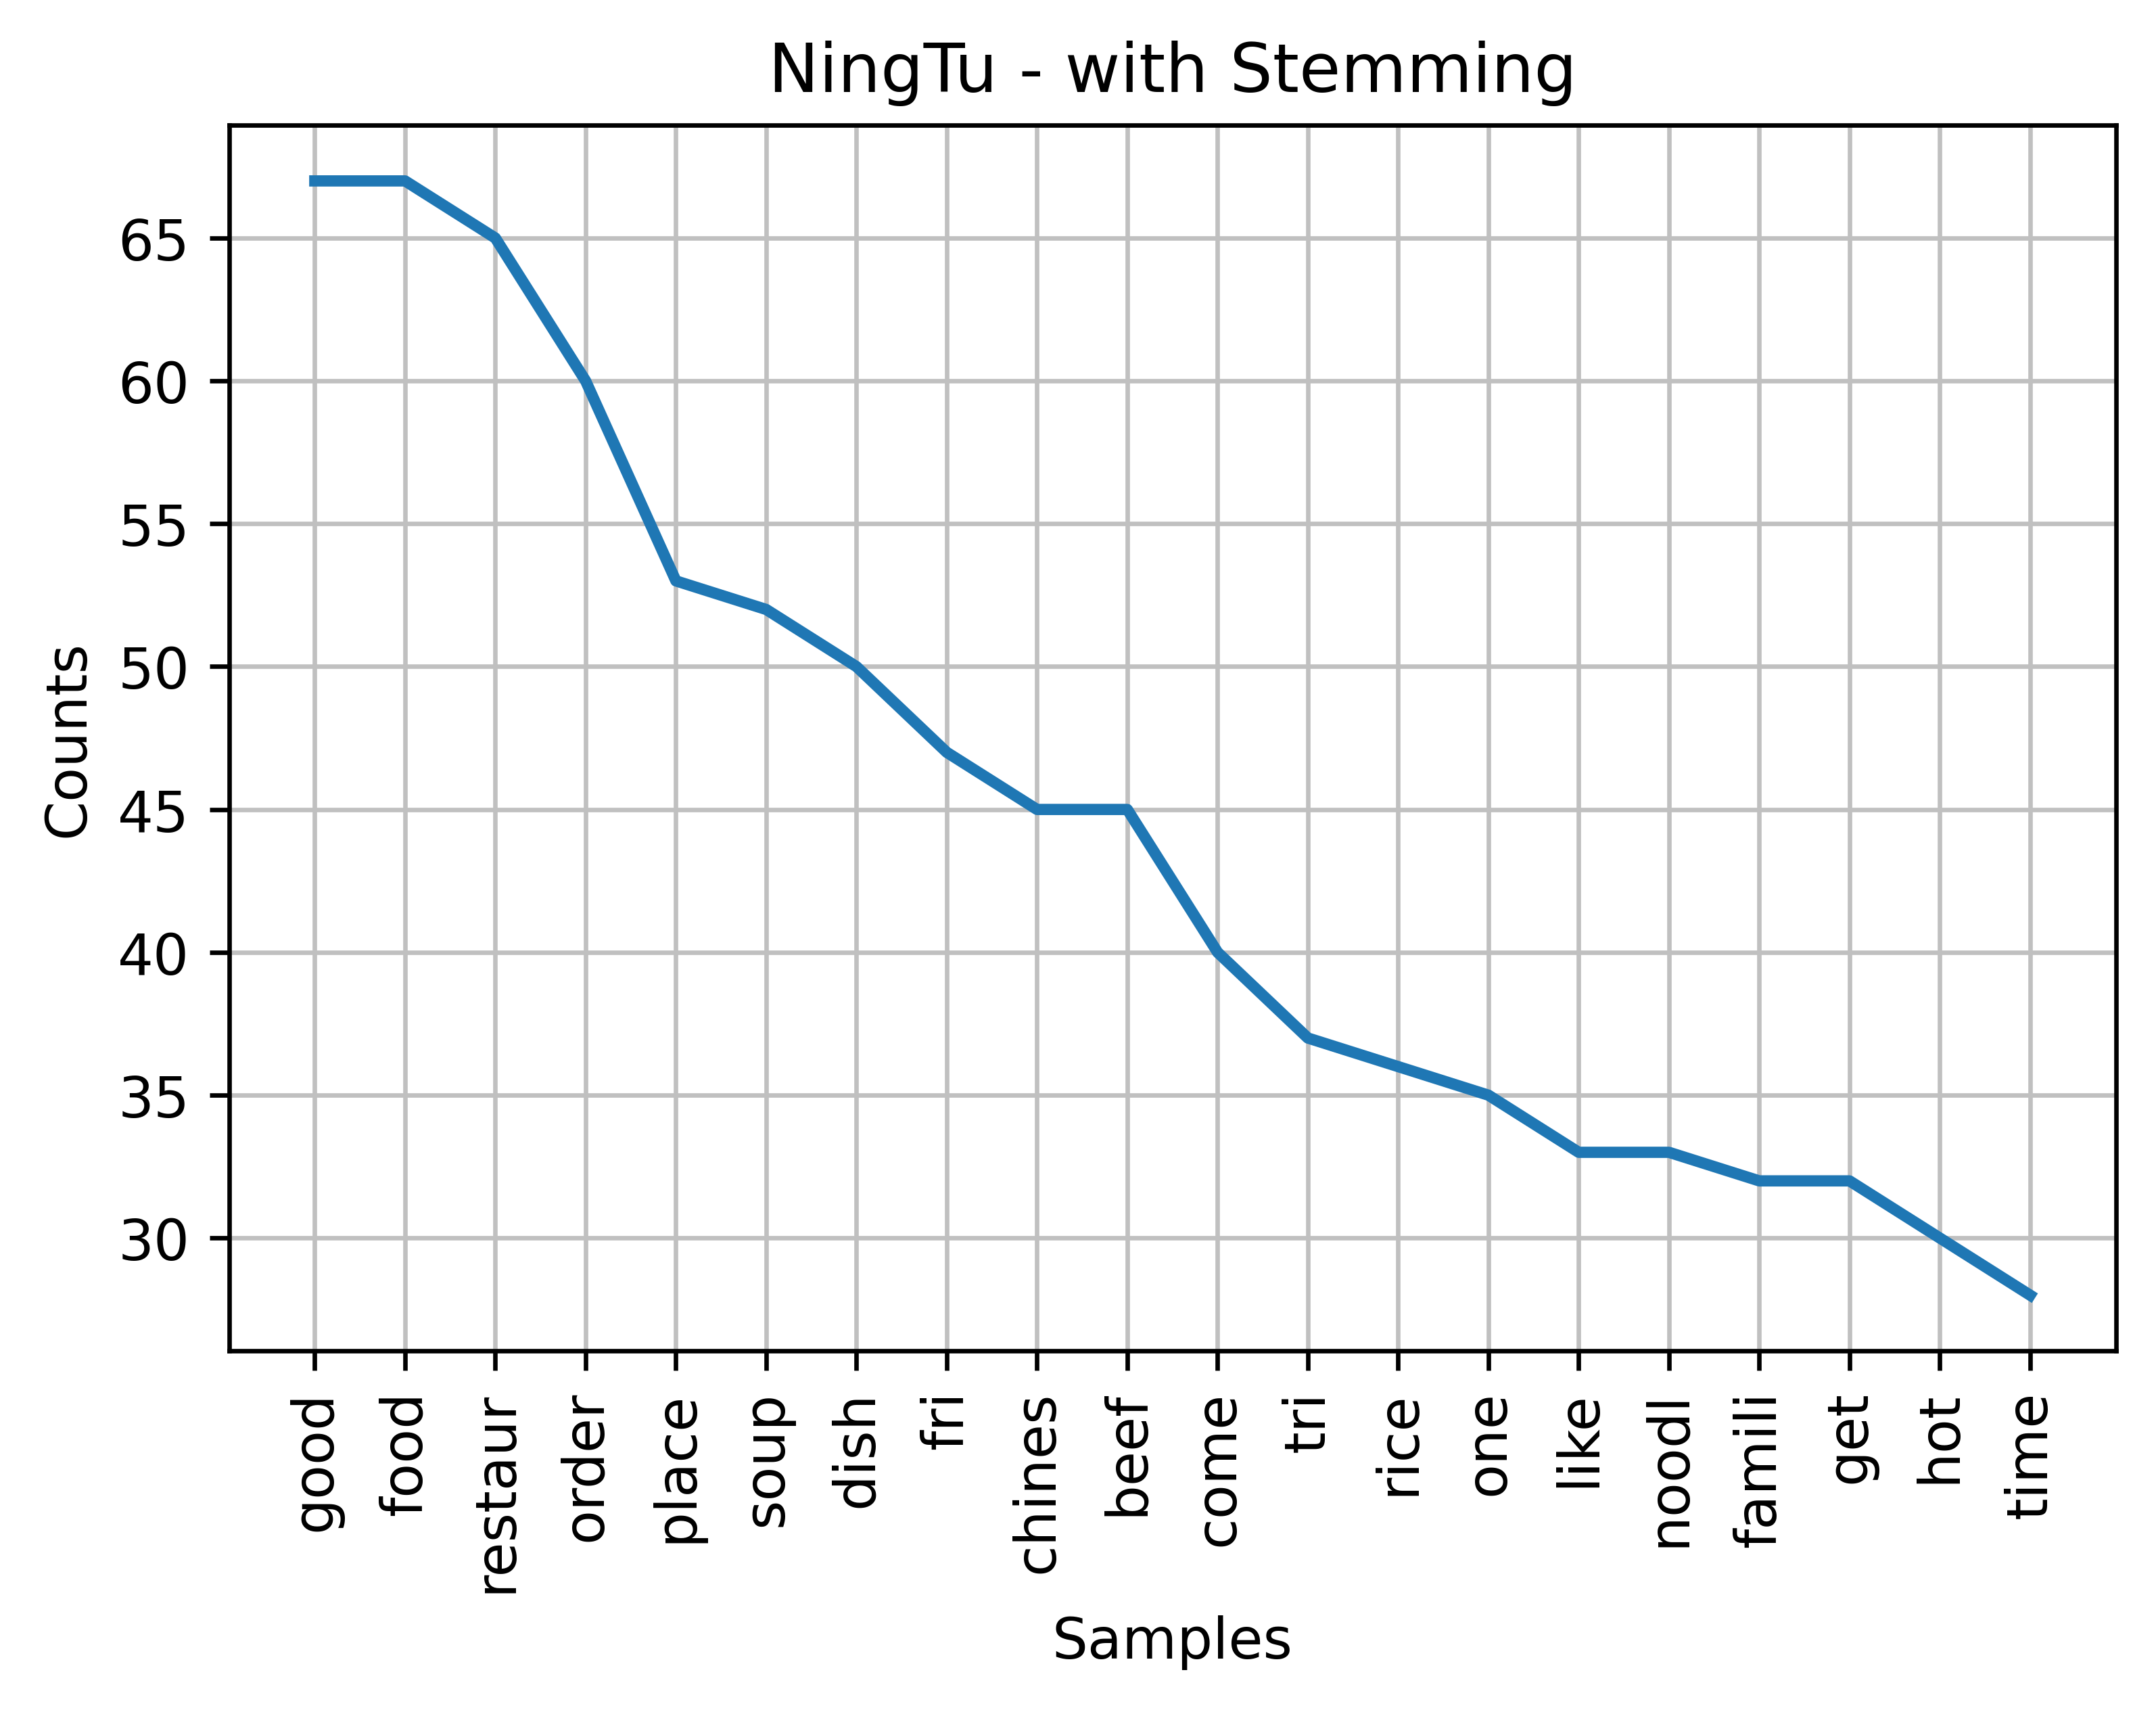

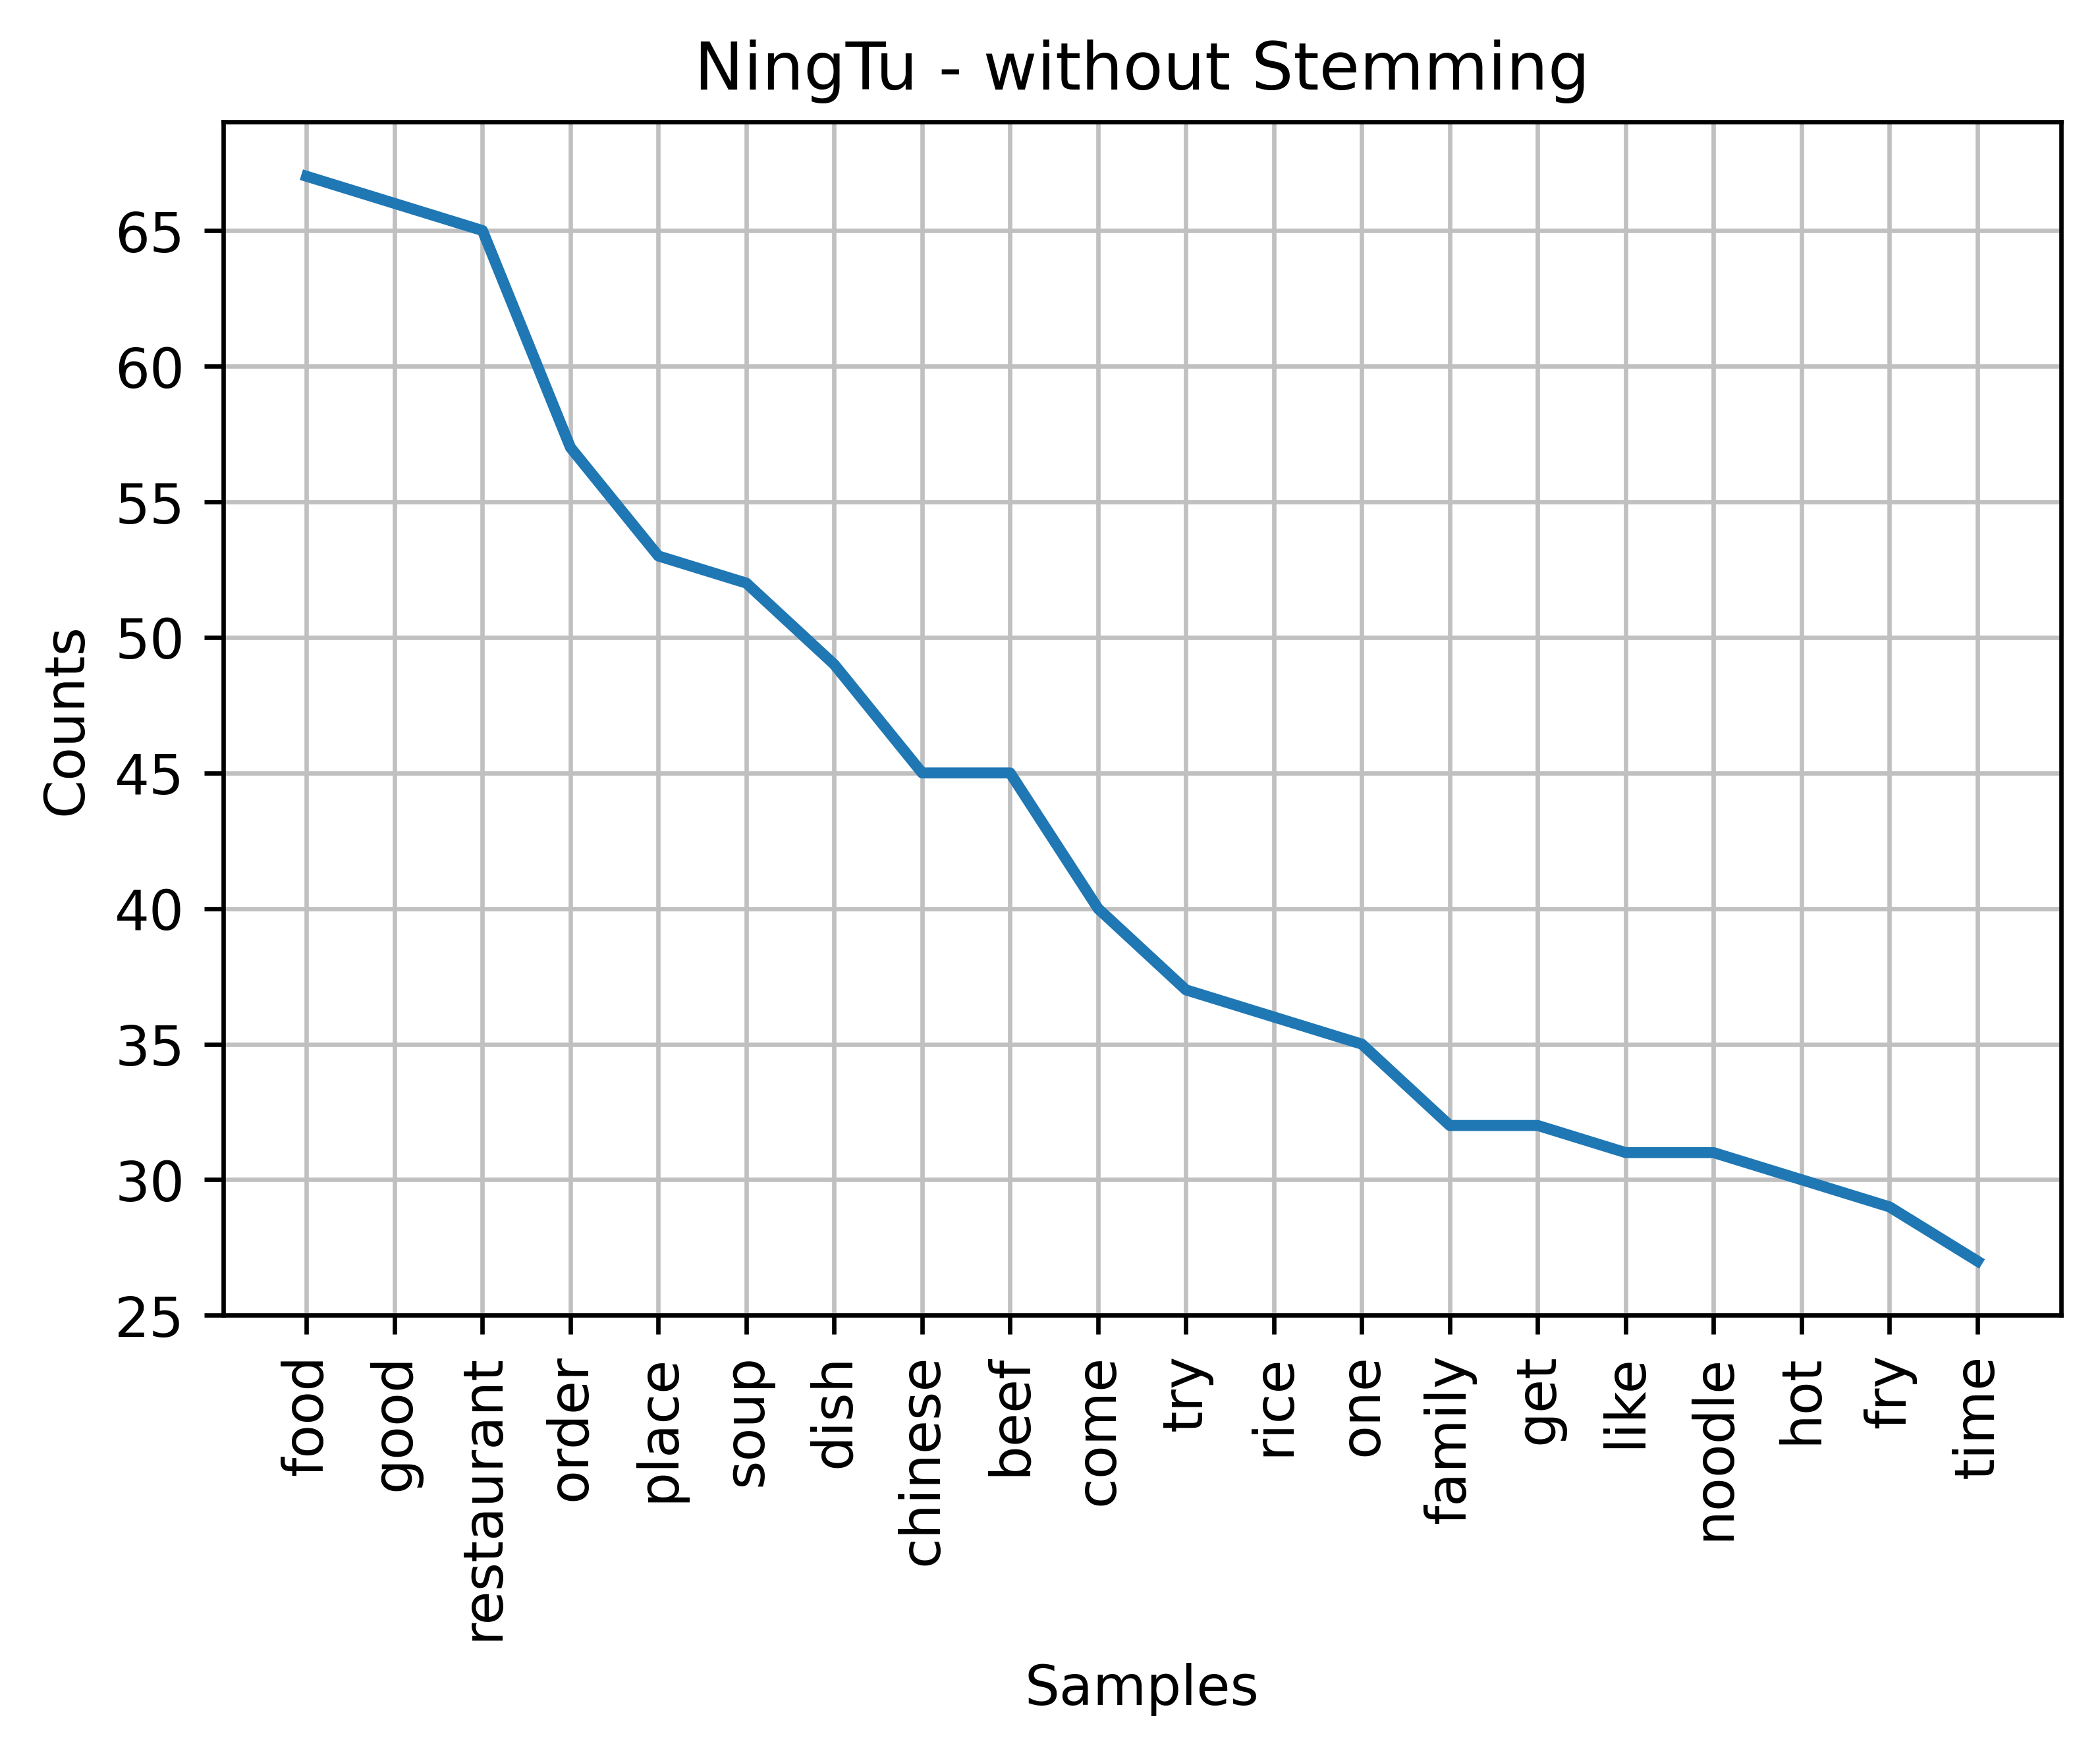

In [21]:
import matplotlib.pyplot as plt
from nltk import FreqDist

freq = FreqDist(filtered_words_withstem)   
fig = plt.figure(dpi=600)
plt.title("NingTu - with Stemming")
freq.plot(20, cumulative=False)
plt.show()
fig.savefig('chinese_withstem.png', bbox_inches = "tight")


freq = FreqDist(filtered_wordslist_withoutstem)   
fig = plt.figure(dpi=600)
plt.title("NingTu - without Stemming")
freq.plot(20, cumulative=False)
plt.show()
fig.savefig('chinese_withoutstem.png', bbox_inches = "tight")

### POS

For POS using CoreNLP, due to problems in applying the latest version of CoreNLP 4.3.1 library, the online POS function provided by CoreNLP is temporarily used in this article. Its version and function are consistent with the function library version.

In [28]:
import nltk
import json
from nltk import word_tokenize
from nltk import word_tokenize,pos_tag

texts = "Our go to on date night and when friend come in to town."
token_word = word_tokenize(texts)
token_words = pos_tag(token_word)
print(token_words)

[('Our', 'PRP$'), ('go', 'NN'), ('to', 'TO'), ('on', 'IN'), ('date', 'NN'), ('night', 'NN'), ('and', 'CC'), ('when', 'WRB'), ('friend', 'NN'), ('come', 'VBP'), ('in', 'IN'), ('to', 'TO'), ('town', 'NN'), ('.', '.')]
